In [1]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [165]:
df = pd.read_csv('realestate.csv')
df.shape

(414, 4)

In [172]:
X = df.iloc[:, :-1]
Y = df.iloc[:, 3]

In [173]:
#insert bias column
X.insert(loc=0, column = 'BIAS', value = np.ones(414))

In [174]:
X.head()

,BIAS,AGE,MRT,STORES
0,1.0,32.0,84.87882,10
1,1.0,19.5,306.59470,9
2,1.0,13.3,561.98450,5
3,1.0,13.3,561.98450,5
4,1.0,5.0,390.56840,5


In [ ]:
#convert to numpy array
X = X.values
Y = Y.values

In [413]:
#normalize values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [414]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

In [415]:
#enter basis function
def basisfunc(X,i):
    res = X
    return res
    
def fun(X):
    i= len(X)
    Y = np.zeros((331,4))
    j=0
    for j in range(i):
        Y[j] = basisfunc(X[j],j+1)
    return Y
    
def hypoth(X,B):
    hypoth = (fun(X)).dot(B)
    return hypoth

In [416]:
def batch_gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)

    for iteration in range(iterations):
        #print(iteration)
        # Hypothesis Values
        h = hypoth(X,B)
        #h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost

    return B, cost_history

In [417]:
#split into test and validation
m = 331
f = 3
X_train = X[:m,:-1]
X_train = np.c_[np.ones(len(X_train),dtype='int64'),X_train]
y_train = Y[:m]
X_test = X[m:,:-1]
X_test = np.c_[np.ones(len(X_test),dtype='int64'),X_test]
y_test = Y[m:]

In [418]:
# Initial coefficients
B = np.zeros(X_train.shape[1])
alpha = 0.005
iter_ = 5000
newB, cost_history = batch_gradient_descent(X_train, y_train, B, alpha, iter_)

In [419]:
print(newB)

[37.41027983  0.         -3.01718104 -8.78074916]


In [420]:
#calculate mean squared error
y_pred = pred(X_test, newB)
mse = np.sqrt(np.sum((y_pred - y_test) ** 2) / y_test.shape[0])
print(mse)

8.389682632151565


In [421]:
#test for induvidual
i=59
def pred(X,B):
    h = X.dot(B)
    return h
y_ = pred(X_test[i],newB)
print (y_,y_test[i])


38.32780656090009 38.6


Text(0.5, 1.0, 'Error vs. Training Epoch')

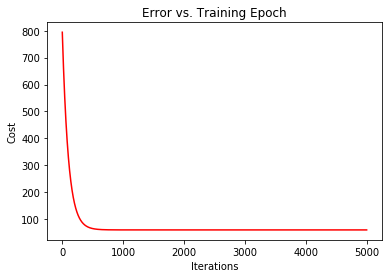

In [422]:
#plot graph
fig, ax = plt.subplots()  
ax.plot(np.arange(iter_), cost_history, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch') 